<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/2021ML/4.%20Discriminate%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LDA(Linear Discriminate Analysis)**

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
x = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
y_le[:,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_le,test_size=0.3, random_state = 11, stratify=y_le)
print('-----------[train_data]-----------')
print(x_train.head())
print('-----------[train_label]-----------')
print(y_train[:5,])

-----------[train_data]-----------
    sepal_length  sepal_width  petal_length  petal_width
5            5.4          3.9           1.7          0.4
49           5.0          3.3           1.4          0.2
8            4.4          2.9           1.4          0.2
71           6.1          2.8           4.0          1.3
55           5.7          2.8           4.5          1.3
-----------[train_label]-----------
[0 0 0 1 1]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
#Default => store_covariance = False | n_components = 2 (n_components: min(n_classes-1, n_features))
x_lda = lda.fit_transform(x_train, y_train)
y_train_pred = lda.predict(x_train)
y_test_pred = lda.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

0.9809523809523809
1.0
[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [ ]:
lda.get_params().keys()

dict_keys(['n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

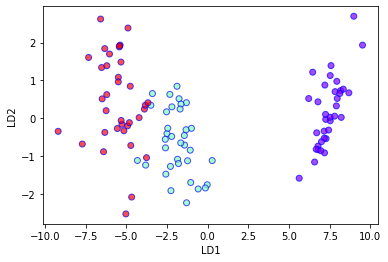

In [ ]:
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    x_lda[:,0],
    x_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
print(lda.means_) #각각의 label들의 대한 각feature들의 평균값
print()
print(lda.xbar_) #전체 label들의 각 feature들의 평균값
print()
print(lda.covariance_) #각각의 label들의 대한 각 feature들의 공분산(모수)값
print()
print(lda.intercept_) #각각의 label들의 bias
print()
print(lda.coef_) #각각의 label들의 대한 각 feature들의 weight(?)

[[4.97428571 3.39142857 1.44571429 0.25714286]
 [5.95142857 2.81428571 4.31714286 1.35428571]
 [6.62857143 2.97142857 5.56       2.01714286]]

[5.85142857 3.05904762 3.77428571 1.20952381]

[[0.23053061 0.08290612 0.13933605 0.02987211]
 [0.08290612 0.10782585 0.04700136 0.03273469]
 [0.13933605 0.04700136 0.1651483  0.04028571]
 [0.02987211 0.03273469 0.04028571 0.0453551 ]]

[ -7.10125848  -3.99997738 -37.28768121]

[[  3.99555946  12.32965892 -16.32587706 -17.42767211]
 [ -1.44265319  -4.02707202   4.92683191   2.58107612]
 [ -2.55290627  -8.3025869   11.39904515  14.84659599]]


# **QDA(QaudraticDiscriminantAnalysis)**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance = True)
qda.fit(x_train, y_train)
#x_qda = qda.transform(x_train, y_train) #QDA는 transform이 없음,,, 그래서 그래프로 표현 불가 그래프로 표현 시 LDA를 통해 그래프 표현해야될 듯

y_train_pred=qda.predict(x_train)
y_test_pred=qda.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

0.9904761904761905
0.9777777777777777
[[35  0  0]
 [ 0 34  1]
 [ 0  0 35]]
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [ ]:
print(qda.means_)
print(qda.covariance_)

[[4.97428571 3.39142857 1.44571429 0.25714286]
 [5.95142857 2.81428571 4.31714286 1.35428571]
 [6.62857143 2.97142857 5.56       2.01714286]]
[array([[0.13078992, 0.09947899, 0.0147395 , 0.00945378],
       [0.09947899, 0.13963025, 0.00922689, 0.0087395 ],
       [0.0147395 , 0.00922689, 0.02431933, 0.00642857],
       [0.00945378, 0.0087395 , 0.00642857, 0.01193277]]), array([[0.25904202, 0.08542017, 0.16056303, 0.05389076],
       [0.08542017, 0.09714286, 0.08621849, 0.04861345],
       [0.16056303, 0.08621849, 0.20381513, 0.07933613],
       [0.05389076, 0.04861345, 0.07933613, 0.04314286]]), array([[0.32210084, 0.07113445, 0.255     , 0.02890756],
       [0.07113445, 0.09621849, 0.04970588, 0.0437395 ],
       [0.255     , 0.04970588, 0.28188235, 0.03864706],
       [0.02890756, 0.0437395 , 0.03864706, 0.0849916 ]])]
